In [5]:
import pandas as pd
import numpy as np
import scipy
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy.integrate import simps
import warnings
import itertools
warnings.filterwarnings("ignore")

# Read 16S data

In [2]:
df_16S_relab = pd.read_excel('../../../../../our_data/16S_relative_abundance_species.xlsx', index_col=0)
df_16S_relab.head()

,A2,ASF356,Acetatifactor,Acetatifactor-muris,Acidovorax,Acinetobacter,Acinetobacter-sp.-CIP-56.2,Acutalibacter-muris,Adlercreutzia-mucosicola,Adlercreutzia-muris,...,[Eubacterium]-ventriosum-group,[Eubacterium]-xylanophilum-group,[Ruminococcus]-gnavus-group,[Ruminococcus]-torques-group,bacterium-enrichment-culture-clone-M153,gut-metagenome,human-gut-metagenome,marine-metagenome,metagenome,mouse-gut-metagenome
SampleID,,,,,,,,,,,,,,,,,,,,,
sample131,0.0,0.001183,0.000078,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000688,0.0,0.0,0.0,0.001803,0.0,0.0,0.0,0.001444
sample132,0.0,0.003461,0.000428,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000684,0.0,0.0,0.0,0.000910,0.0,0.0,0.0,0.008572
sample133,0.0,0.000619,0.000776,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.003797,0.0,0.0,0.0,0.003194
sample134,0.0,0.002272,0.000048,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000497,0.0,0.0,0.0,0.004312,0.0,0.0,0.0,0.004088
sample135,0.0,0.001034,0.000479,0.0,0.0,0.0,0.0,0.0,0.000142,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.006577,0.0,0.0,0.0,0.006032


# Read qPCR data

In [3]:
df_qpcr = pd.read_excel('../../../../../our_data/qPCR.xlsx', index_col=0)
df_qpcr.columns= ['qPCR']
df_qpcr.head()

,qPCR
SampleID,
sample131,9.157619e+07
sample132,1.170283e+08
sample133,5.842790e+07
sample134,2.131828e+08
sample135,8.844480e+07


# Read metadata for inulin

In [4]:
df_meta = pd.read_excel('../../../../../our_data/meta_data.xlsx', index_col=0)
df_meta = df_meta[df_meta.Diet=='Inulin']
df_16S_relab = df_16S_relab.loc[df_meta.index]
df_qpcr = df_qpcr.loc[df_meta.index]
df_meta = pd.merge(df_meta, df_16S_relab, left_index=True, right_index=True)
df_meta = pd.merge(df_meta, df_qpcr, left_index=True, right_index=True)
df_meta.head()

,MiceID,Vendor,Day,Diet,RandomizedGroup,A2,ASF356,Acetatifactor,Acetatifactor-muris,Acidovorax,...,[Eubacterium]-xylanophilum-group,[Ruminococcus]-gnavus-group,[Ruminococcus]-torques-group,bacterium-enrichment-culture-clone-M153,gut-metagenome,human-gut-metagenome,marine-metagenome,metagenome,mouse-gut-metagenome,qPCR
SampleID,,,,,,,,,,,,,,,,,,,,,
sample141,BI1,Beijing,0,Inulin,A,0.000000,0.000795,0.001339,0.0,0.0,...,0.000679,0.0,0.0,0.0,0.002735,0.0,0.000000,0.0,0.002832,7.332081e+07
sample142,BI2,Beijing,0,Inulin,B,0.001752,0.000554,0.000734,0.0,0.0,...,0.000412,0.0,0.0,0.0,0.001056,0.0,0.000039,0.0,0.002371,4.562151e+07
sample143,BI3,Beijing,0,Inulin,D,0.000000,0.000849,0.000394,0.0,0.0,...,0.000360,0.0,0.0,0.0,0.001029,0.0,0.000000,0.0,0.001672,1.625439e+08
sample144,BI4,Beijing,0,Inulin,E,0.000463,0.001064,0.000704,0.0,0.0,...,0.000892,0.0,0.0,0.0,0.001235,0.0,0.000051,0.0,0.000000,1.337674e+08
sample145,BI5,Beijing,0,Inulin,C,0.000000,0.000765,0.000744,0.0,0.0,...,0.000430,0.0,0.0,0.0,0.002296,0.0,0.000000,0.0,0.000461,1.606161e+08


# Test association between inulin responder proportion and qPCR

In [15]:
# lines = []
# inulin_responders = ['Bacteroides-acidifaciens','Muribaculaceae','Faecalibaculum','Parasutterella','Bacteroides']
# for mice in set(df_meta.MiceID):
#     curr_df = df_meta[df_meta.MiceID==mice].sort_values(by='Day')
#     vendor = list(set(curr_df['Vendor']))[0]
#     for responder in inulin_responders:
#         y = list(curr_df[responder])
#         z = list(curr_df['qPCR'])
#         log10_z = np.log10(z)
#         lines.append([mice, 
#                       vendor, 
#                       responder,
#                       pearsonr(y,z)[0], 
#                       spearmanr(y,z)[0],
#                       pearsonr(y,log10_z)[0], 
#                       spearmanr(y,log10_z)[0],
#                      ])
# df = pd.DataFrame(lines, columns=['MiceID','Vendor','Responder','Pearson_linlin','Spearman_linlin','Pearson_linlog','Spearman_linlog'])

lines = []
inulin_responders = ['Bacteroides-acidifaciens','Muribaculaceae','Faecalibaculum','Parasutterella','Bacteroides']
for responder in inulin_responders:
    spearman_coef = spearmanr(np.asarray(df_meta[responder]), np.asarray(df_meta.qPCR))[0]
    r2 = LinearRegression().fit(np.asarray(df_meta[responder]).reshape(-1,1), np.asarray(df_meta.qPCR)).score(np.asarray(df_meta[responder]).reshape(-1,1), np.asarray(df_meta.qPCR))
    lines.append([responder,spearman_coef, r2])
    #print(spearmanr(df_meta[responder], df_meta.qPCR)[1])
df = pd.DataFrame(lines, columns=['Responder','Spearman','R2'])
df.head()

,Responder,Spearman,R2
0,Bacteroides-acidifaciens,0.535117,0.087351
1,Muribaculaceae,0.440160,0.147911
2,Faecalibaculum,-0.255639,0.050384
3,Parasutterella,-0.389428,0.171212
4,Bacteroides,-0.463920,0.248784


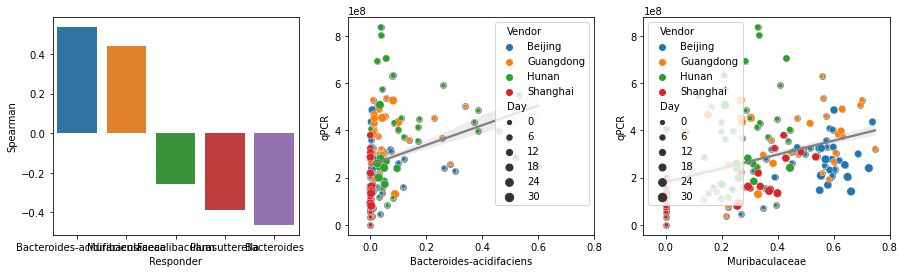

In [17]:
fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(15,4))

# spearman
_ = sns.barplot(x='Responder', y='Spearman', data=df, ax=ax[0], ci=68)

# Bacteroides-acidifaciens
_ = sns.regplot(x='Bacteroides-acidifaciens', y='qPCR', color='gray', data=df_meta, ax=ax[1], ci=68)
_ = sns.scatterplot(x='Bacteroides-acidifaciens', y='qPCR', hue='Vendor', size='Day', data=df_meta, ax=ax[1])
_ = ax[1].set_xlim([-0.08,0.8])

# Muribaculaceae
_ = sns.regplot(x='Muribaculaceae', y='qPCR', color='gray', data=df_meta, ax=ax[2], ci=68)
_ = sns.scatterplot(x='Muribaculaceae', y='qPCR', hue='Vendor', size='Day', data=df_meta, ax=ax[2])
_ = ax[2].set_xlim([-0.08,0.8])

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('responder_qpcr_corr.svg', format='svg')

# Test association between baseline and inulin responder proportion

In [39]:
lines = []
corr = []
inulin_responders = ['Bacteroides-acidifaciens','Muribaculaceae']
all_bacteria = list(df_16S_relab.columns)
for bac in all_bacteria:
    for responder in inulin_responders:
        baseline = []
        area = []
        for mice in set(df_meta.MiceID):
            curr_df = df_meta[df_meta.MiceID==mice].sort_values(by='Day')
            vendor = list(set(curr_df['Vendor']))[0]
            baseline.append(list(curr_df[bac])[0])
            x = list(curr_df.Day)
            y = list(curr_df[responder])
            area.append(simps(y,x)/np.max(x))
            lines.append([mice, 
                          vendor, 
                          bac,
                          responder,
                          baseline[-1],
                          area[-1]
                         ])
        spearman_coef = spearmanr(baseline,area)[0]
        r2 = LinearRegression().fit(np.asarray(baseline).reshape(-1,1), np.asarray(area)).score(np.asarray(baseline).reshape(-1,1), np.asarray(area))
        corr.append([bac,responder,np.max(baseline), np.max(area), np.mean(baseline), np.mean(area), spearman_coef, r2])
df = pd.DataFrame(corr, columns=['Bacteria','Responder','MaxBacteria','MaxResponder','MeanBacteria','MeanResponder','Spearman','R2'])
df_detailed = pd.DataFrame(lines, columns=['MiceID','Vendor','Bacteria','Responder','Baseline','Area'])
df.head()

,Bacteria,Responder,MaxBacteria,MaxResponder,MeanBacteria,MeanResponder,Spearman,R2
0,A2,Bacteroides-acidifaciens,0.002423,0.117904,0.000647,0.041125,-0.777851,0.455158
1,A2,Muribaculaceae,0.002423,0.580745,0.000647,0.365351,-0.447790,0.184023
2,ASF356,Bacteroides-acidifaciens,0.002869,0.117904,0.000840,0.041125,0.403717,0.217729
3,ASF356,Muribaculaceae,0.002869,0.580745,0.000840,0.365351,0.527620,0.203485
4,Acetatifactor,Bacteroides-acidifaciens,0.006423,0.117904,0.001330,0.041125,-0.490196,0.196283


Bacteroides-acidifaciens Bacteroides SpearmanrResult(correlation=-0.7481940144478844, pvalue=0.00035556828754260204)
Bacteroides-acidifaciens Bacteroides-acidifaciens SpearmanrResult(correlation=0.7275541795665634, pvalue=0.0006215020932519374)
Muribaculaceae Parabacteroides-goldsteinii SpearmanrResult(correlation=-0.9256965944272446, pvalue=3.6936283769727216e-08)
Muribaculaceae Desulfovibrionaceae SpearmanrResult(correlation=0.6845638496165475, pvalue=0.0017242242213718415)


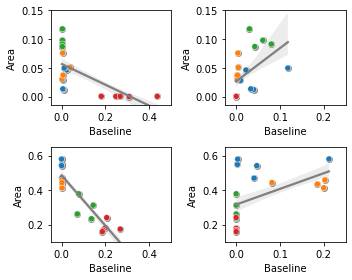

In [44]:
fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(5,4))

# mean relative abundance >= 0.01, max relative abundance >= 10%
df = df[(df.MeanBacteria>=0.01) & (df.MaxBacteria>=0.1)]
lines = []
for responder in ['Bacteroides-acidifaciens','Muribaculaceae']:
    df_tmp = df[df.Responder==responder]
    df_tmp = df_tmp.sort_values('Spearman', ascending=True)
    lines.append([responder, df_tmp.iloc[0]['Bacteria']])
    df_tmp = df_tmp.sort_values('Spearman', ascending=False)
    lines.append([responder, df_tmp.iloc[0]['Bacteria']])

k=0
for i in [0,1]:
    for j in [0,1]:
        df_tmp = df_detailed[(df_detailed.Bacteria==lines[k][1])&(df_detailed.Responder==lines[k][0])].sort_values('Vendor')
        _ = sns.regplot(x='Baseline', y='Area', color='gray', data=df_tmp, ax=ax[i,j], ci=68)
        _ = sns.scatterplot(x='Baseline', y='Area', hue='Vendor', data=df_tmp, ax=ax[i,j])
        _ = ax[i,j].legend().remove()
        print(lines[k][0], lines[k][1], spearmanr(df_tmp.Baseline, df_tmp.Area))
        if j==0:
            _ = ax[i,j].set_xlim([-0.05,0.5])
        if j==1:
            _ = ax[i,j].set_xlim([-0.025,0.25])
        if i==0:
            _ = ax[i,j].set_ylim([-0.015,0.15])
        if i==1:
            _ = ax[i,j].set_ylim([0.1,0.65])
        k += 1
        
plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('baseline_responder_corr.svg', format='svg')